## to add domain names to os

https://www.youtube.com/watch?v=45dAJi-aoZM
- this pretends local machine has same domain name as production system
- this is required else ALLOWED_HOSTS does not work, error message: IP address/ pair not allowed

In [ ]:
sudo nano /etc/hosts

In [ ]:
# add to /etc/hosts file

127.0.0.1 www.example.com

cntrl + o to save

test domain

In [4]:
ping www.example.com

# will have ping back

SyntaxError: invalid syntax (<ipython-input-4-4dc1e41a232a>, line 1)

## tenant

https://www.youtube.com/watch?v=_wefsc8X5VQ

settings.py

In [ ]:
ALLOWED_HOSTS = ['127.0.0.1','example.com', '.example.com']

INSTALLED_APPS = [
    'tenant',
]

models.py

-  class Member(TenantAwareModel):
    - inherit from TenantAwareModel, auto create 1-1 relationship with member

In [ ]:
from django.db.models.base import Model

# Create your models here.

class Tenant(models.Model):
    name = models.CharField(max_length = 255)
    subdomain = models.CharField(max_length = 255)

class TenantAwareModel(models.Model):
    tenant = models.ForeignKey(Tenant, on_delete= models.CASCADE)

class Member(TenantAwareModel):
    name = models.CharField(max_length= 255)

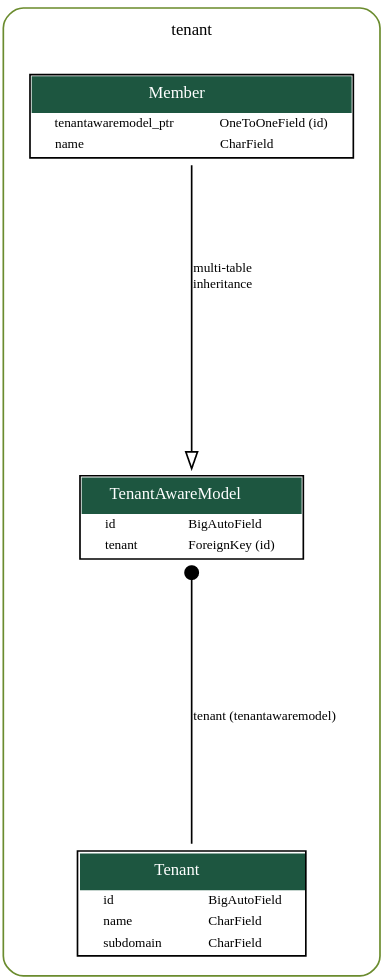

In [6]:
from IPython import display
display.Image("./tenant2.png")

### add tenants and users via superuser

### add views

utilities.py

In [ ]:
from .models.import Tenant

def get_hostname(request):
    return request.get_host().split(':')[0].lower()


def get_tenant(request):
    hostname= get_hostname(request)
    subdomain = hostname.split('.')[0]
    return Tenant.objects.filter(subdomain = subdomain).first()

views.py

In [1]:
from django.shortcuts import render
from .models import Member
from .utilities import get_tenant

# Create your views here.


def our_team(request):
    tenant = get_tenant(request)
    members = Member.objects.filter(tenant= tenant)

    return render(request, 'tenant/our_team.html', {'tenant': tenant, 'members': members})

ModuleNotFoundError: No module named 'django'